<a href="https://colab.research.google.com/github/pedrecho/scrap_news/blob/main/habr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Web-scraping


Импортируем библиотеку, необходимую, чтобы сделать запрос.

In [273]:
import requests

Берём ссылку на страницу новостей на сатйе habr.ru.

С помощью цикла получаем html с первых пяти странниц сайта.
Код 200 означает, что подключение прошло успешно.

In [274]:
url = 'https://habr.com/ru/news/page'
html = ''
for page in range(1, 6):
  print(url + str(page))
  page = requests.get(url + str(page))
  print(page.status_code)
  html += page.text

https://habr.com/ru/news/page1
200
https://habr.com/ru/news/page2
200
https://habr.com/ru/news/page3
200
https://habr.com/ru/news/page4
200
https://habr.com/ru/news/page5
200


Добавляем библиотеку, с помощью которой будем искать интересующие нас параметры внутри html.

In [275]:
from bs4 import BeautifulSoup

In [276]:
soup = BeautifulSoup(html, "html.parser")
# print(soup)

Находим все статьи, с полученных ранее страниц. Каждая из этих страниц является новостью, содержащей множество разных параметров.

Всего мы нашли 100 новостей.

In [277]:
articles = soup.findAll('article')
print(len(articles))

100


Выделим из каждой новости следующие параметры: заголовок, ссылка на статью, время публикации и количество просмотров.
Внутри цикла находим и записывем сотвествующие данные в списки.

In [278]:
title = []
link = []
time = []
views = []
for item in articles:
  title.append(item.div.h2.a.span.text)
  link.append('habr.ru' + item.div.h2.a['href'])
  time.append(item.div.div.div.findAll('span')[2].time.text.split(' ')[-1])
  views.append(item.find('span', title='Количество просмотров').span.text)
print(title)
print(link)
print(time)
print(views)

['CD Project Red откупилась от инвесторов', 'Опрос: более трети россиян высказались за меры безопасности в интернете', 'Facebook выплатила в России штрафов на 17 млн рублей, приставы закрыли все текущие дела против компании', 'Firefox 95.0.1 исправляет проблемы подключения к сайтам Microsoft', 'Художник закрыл аккаунт DeviantArt — его работы воруют и продают как NFT', 'МВД: глобальный сбой в федеральной информационной системе ГИБДД произошел из-за коммунальной аварии в серверной', 'Обновление руководства по архитектуре приложений', 'Сотрудники Госавтоинспекции Москвы подписываются на аккаунты блогеров, публикующих видео с нарушениями ПДД', 'Эксперты выпустили подробный технический отчет о блокировке Tor в России', 'Сингапурские инженеры сделали умное стекло, подстраивающееся под температурный режим', 'Telegram выплатил в России штрафов на 15 млн рублей, приставы закрыли 6 возбуждённых против компании дел', 'Теоретики считают, что ответ на загадку преобладания материи над антиматерией м

Работа с базой данных.

Подключаем pandas, чтобы создать удобную базу данных.

In [279]:
import pandas as pd

In [280]:
df = pd.DataFrame({'Title': title,
                   'Link': link,
                   'Time': time,
                   'Views': views})
df.sample(10)

,Title,Link,Time,Views
48,Сотовые операторы готовят повышение цен на 6-1...,habr.ru/ru/news/t/596213/,10:26,2.5K
56,Предзаказ на Two Trees TS3 на Kickstarter: дос...,habr.ru/ru/news/t/596147/,19:57,1.8K
96,Apple бессрочно отложила возвращение в офисы и...,habr.ru/ru/news/t/595917/,09:13,2K
35,По США прокатилась волна отмены занятий в школ...,habr.ru/ru/news/t/596271/,12:50,1.2K
21,Акционеры Amazon призывают провести независимы...,habr.ru/ru/news/t/596389/,20:23,1.7K
23,BusKill представила USB-кабель с магнитным кре...,habr.ru/ru/news/t/596357/,18:21,5.6K
44,"Kickstarter объяснила, по какому протоколу пер...",habr.ru/ru/news/t/596231/,11:14,746
42,Глава Instagram анонсировал три новые возможно...,habr.ru/ru/news/t/596245/,11:47,1.1K
77,Instagram дала возможность загружать в «Истори...,habr.ru/ru/news/t/596049/,15:08,483
39,В «Сапсанах» тестируют сервисы оплаты с исполь...,habr.ru/ru/news/t/596253/,11:59,592


Создадим дополнительный столбец, содержащий только час публикации новости.

In [281]:
hour = []
for item in df['Time']:
  hour.append(int(item.split(':')[0]))
df.loc[:, 'Hour'] = hour

In [283]:
df.sample(5)

,Title,Link,Time,Views,Hour
63,В центре Гамалеи разрабатывают препарат для по...,habr.ru/ru/news/t/596127/,18:28,844,18
36,Ученые разработали метод диагностики рака без ...,habr.ru/ru/news/t/596267/,12:45,1.1K,12
7,Сотрудники Госавтоинспекции Москвы подписывают...,habr.ru/ru/news/t/596509/,10:00,4.5K,10
82,Появились первые детали ремейка игры Splinter ...,habr.ru/ru/news/t/596019/,13:44,962,13
8,Эксперты выпустили подробный технический отчет...,habr.ru/ru/news/t/596507/,09:14,9.5K,9


Добавляем библиотеку, чтобы построить график, показывающий, в какое время чаще публикуют новости.

In [266]:
import matplotlib.pyplot as plt

Проссумируем количество новостей по времени и запишем в переменную plot.

In [267]:
hour = df['Hour'].value_counts()
print(hour)
plot = [0] * 24
for i in range(len(hour)):
  plot[int(hour.index[i])] += hour[i]
print(plot)

10    14
13    13
11    12
12    10
14     8
15     8
18     7
17     6
16     4
19     4
21     4
09     3
23     2
22     2
20     1
08     1
07     1
Name: Hour, dtype: int64
[0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 14, 12, 10, 13, 8, 8, 4, 6, 7, 4, 1, 4, 2, 2]


Построим график.

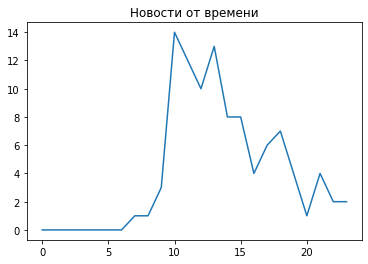

In [268]:
plt.plot(list(range(24)), plot)
plt.title('Новости от времени')
plt.show()

Сохраним DataFrame.

In [269]:
df.to_csv("habr.csv", index=False)